## Sketch of ML models

In [2]:
print("hello world!")

hello world!


Relevant library/modules import

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing as sk

EDA and preparation

In [4]:
df_red = pd.read_csv('winequality-red.csv', sep= ';') # sep to identify the ";" value separation (observable in csv file) 

In [5]:
df_white = pd.read_csv('winequality-white.csv', sep= ';') # sep to identify the ";" value separation (observable in csv file) 

In [6]:
# creating a new column called "quality_label", we define a range and associate that range with a label
df_red ['quality_label'] = df_red['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# transforming these labels into categrical data type (specific to pandas) instead of simple string
df_red ['quality_label'] = pd.Categorical(df_red['quality_label'],
categories=['low', 'medium', 'high'])

In [7]:
# creating a new column called "quality_label", we define a range and associate that range with a label
df_white ['quality_label'] = df_white['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# transforming these labels into categrical data type (specific to pandas) instead of simple string
df_white['quality_label'] = pd.Categorical(df_white['quality_label'],
categories=['low', 'medium', 'high'])

In [8]:
# Addition of column of type of wine (white or red) before concatenating (Pandas)
df_white ['type'] = df_white.apply(lambda value: 'white')
df_white ['type'] = df_white['type'].fillna('white')


In [9]:
# Addition of column of type of wine (white or red) before concatenating (Pandas)
df_red['type'] = df_red.apply(lambda value: 'red')
df_red['type'] = df_red['type'].fillna('red')


In [10]:
# DF merge
df_mix = pd.concat([df_red, df_white]) 


In [11]:
# index re-adjustment
df_mix.reset_index(inplace=True)

In [12]:
# index re-adjustment
df_mix.pop('index')

0          0
1          1
2          2
3          3
4          4
        ... 
6492    4893
6493    4894
6494    4895
6495    4896
6496    4897
Name: index, Length: 6497, dtype: int64

ML logistic regression model prep

In [13]:
# new data drame for ML purposes
dfm=df_mix.copy()

In [14]:
df_mix.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low,red


In [15]:
# data encoding to avoid having cat/obj data fed into the ML model
dfm['quality_label'].replace({'low':0, 'medium':1, 'high':2},inplace=True)
dfm['type'].replace({'red':0, 'white':1}, inplace=True) # object encoder 


In [16]:
# encoding categorical data with "pd.get_dummies"
cat_col_qlabel = dfm.select_dtypes('category')
cat_col_qlabel_encode = pd.get_dummies(cat_col_qlabel, dtype=int)


In [17]:
# category columns are deleted to be replaced with the boolean "1" or "0" option for use in the ML model as "low-to-high classification" is not suitable
dfm.drop(columns=cat_col_qlabel, axis=1, inplace=True)

In [18]:
# inserting the new new 'encoded' columns into a new labelled DF   
dfml = pd.concat([dfm, cat_col_qlabel_encode], axis=1)

In [19]:
# encoded columns are now inserted as shown below
dfml.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_label_0,quality_label_1,quality_label_2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,1,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,1,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,1,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,0,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,1,0,0


In [20]:
# splitting module
from sklearn.model_selection import train_test_split

In [21]:
# split data in x and y

X = dfml.drop('type', axis=1)
y = dfml['type']

In [22]:
# split data between test and train data (validation set is not defined with train_test_split)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)

In [23]:
# reviewing shape partition/split according with the 'test_size' described above → train/test should correspond to the share allocated to each
print('X_test accounts to:', X_test.shape) 
print('X_train accounts to:', X_train.shape)
print('y_test accounts to:', y_test.shape)
print('y_train accounts to:', y_train.shape)

X_test accounts to: (1625, 15)
X_train accounts to: (4872, 15)
y_test accounts to: (1625,)
y_train accounts to: (4872,)


In [24]:
from sklearn.linear_model import LogisticRegression 

In [25]:
# defining the ML model with a defined random state matching the one defined above in the splitted data
logreg_model = LogisticRegression(random_state=42)

In [26]:
# fitting the model with the data purposed for training 
logreg_model.fit(X_train, y_train)

c:\Users\EWF\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [27]:
#predicting with the model

predict = logreg_model.predict(X_test)

In [28]:
# wine type prediction depicted below 1 and 0 accounting to red and white, respectively 
predict

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [29]:
# accuracy function is imported to derive the classification accuracy score 

from sklearn.metrics import accuracy_score

In [30]:
# accuracy of the ML model 
acc = accuracy_score(y_test, predict)
print(acc)

0.9747692307692307


In [31]:
# testing the model with new batch of random generated data for wines without the corresponding red/white classification

# Define column names
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 
           'pH', 'sulphates', 'alcohol', 'quality', 'quality_label_0', 
           'quality_label_1', 'quality_label_2']

# Define ranges for each column
ranges = {
    'fixed acidity': (4, 10),
    'volatile acidity': (0, 1),
    'citric acid': (0, 1),
    'residual sugar': (2, 55),
    'chlorides': (0.001, 0.09),
    'free sulfur dioxide': (15, 50),
    'total sulfur dioxide': (110, 250),
    'density': (0, 1),
    'pH': (3.01, 3.50),
    'sulphates': (0.20, 0.70),
    'alcohol': (7, 18),
    'quality': (1, 10),
    'quality_label_0': (0, 1),
    'quality_label_1': (0, 1),
    'quality_label_2': (0, 1)
}

# Generate random data
data = {col: np.random.uniform(low, high, 100) if col not in ['quality_label_0', 'quality_label_1', 'quality_label_2']
        else np.random.randint(low, high+1, 100) for col, (low, high) in ranges.items()}

# Create DataFrame
X1_test = pd.DataFrame(data)

# Display DataFrame
X1_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label_0,quality_label_1,quality_label_2
0,9.233973,0.245238,0.806245,38.848056,0.032423,41.030112,169.199635,0.347198,3.200720,0.424307,17.450570,4.644168,1,1,0
1,8.789946,0.605752,0.718652,51.725207,0.043594,45.977463,212.138544,0.062806,3.220912,0.642255,15.985395,6.752141,1,1,0
2,8.328714,0.148960,0.215422,19.608959,0.069447,23.261915,238.428379,0.229380,3.396769,0.313485,10.763857,7.814253,1,0,1
3,4.329122,0.923170,0.136542,31.898509,0.053480,32.288251,186.234122,0.181080,3.401492,0.232246,7.461934,9.229464,0,1,0
4,4.590794,0.529027,0.289520,7.813809,0.042628,39.701805,141.086857,0.582696,3.268704,0.488722,7.431066,9.699669,1,1,0


In [32]:
# prediction for the new DF of unclassified wines
predict1 = logreg_model.predict(X1_test)
print(predict1)

[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


ML random forest model prep for wine type (with duplicates)

In [33]:
# import of the random forest module to build this type of ML models 
from sklearn.ensemble import RandomForestClassifier

In [34]:
# random forest model build-up

RF_model = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=62)



In [35]:
# fitting the RF model

RF_model.fit(X_train, y_train)


RandomForestClassifier(random_state=62)

In [36]:

# prediction of red/white wine classification using the RF model, note → the model returns different output than LogReg model 
RF_prediction = RF_model.predict(X_test)
RF_prediction


array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [37]:
# obtining accuracy score of the model, note → it is higher than the obtained above
RF_accuracy_score = accuracy_score(y_test,RF_prediction)
print(RF_accuracy_score)

0.9956923076923077


In [38]:
# running the model on the random batch data, note → as above, the model returns different output than LogReg model 
RF_model.predict(X1_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

Performing Logistic Regression model for wine "quality_label" (with duplicates)

In [39]:
# obtaining clean ml model
df1 = df_mix.copy()
df1['type'].replace({'red':0, 'white':1}, inplace=True) #converting to numeric data

In [40]:
# importing the label encoder function used to encode ordinal variables for target value y (in this case 'quality')

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [148]:
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,type,quality_label_encoded
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low,0,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low,0,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium,0,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low,0,1


In [120]:
# Using ordinal encoder for the 'quality_label' column

from sklearn.preprocessing import OrdinalEncoder

quality_order = [['low', 'medium', 'high']]

o_enc = OrdinalEncoder(categories=quality_order)

df2 = df_mix.copy()

df2['type'].replace({'red':0, 'white':1}, inplace=True) #converting to numeric data

encoded_data = o_enc.fit_transform(df2[['quality_label']])

df2['quality_label_encoded']= encoded_data.astype(int)

df2m= df2.drop('quality_label', axis=1)


In [116]:
# review of the value for each encoded category 
encoded_q_labels =  o_enc.categories_
for i, category in enumerate(encoded_q_labels[0]):
    print(f"{category} corresponds to encoded value: {i}")

low corresponds to encoded value: 0
medium corresponds to encoded value: 1
high corresponds to encoded value: 2


In [117]:
# encoding the quality label using label encoder
df1['quality_label_encoded'] =le.fit_transform(df1['quality_label'])


In [44]:
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,type,quality_label_encoded
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low,0,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low,0,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium,0,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low,0,1


In [118]:
# quality label column is no longer useful as it is not numeric column which was replaced by encoded column above 
df1m= df1.drop('quality_label', axis=1)

In [46]:
df1m['quality_label_encoded'].value_counts()

quality_label_encoded
2    3915
1    2384
0     198
Name: count, dtype: int64

In [47]:
class_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Class to Encoded Value Mapping:")
print(class_mapping)

Class to Encoded Value Mapping:
{'high': 0, 'low': 1, 'medium': 2}


In [48]:
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,type,quality_label_encoded
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low,0,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low,0,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium,0,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low,0,1


In [158]:
df2m['quality_label_encoded'].value_counts()

quality_label_encoded
1    3915
0    2384
2     198
Name: count, dtype: int64

In [121]:
# splitting data in x and y 

X1 = df2m.drop('quality_label_encoded', axis=1)
y1 = df2m['quality_label_encoded']

In [157]:
df2m.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_label_encoded
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1,1
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,1,1


In [122]:
# Setup of the training data 
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.3, random_state=42)


In [123]:
# reviewing shape partition/split according with the 'test_size' described above → train/test should correspond to the share allocated to each
print('X1_test accounts to:', X1_test.shape) 
print('X1_train accounts to:', X1_train.shape)
print('y1_test accounts to:', y1_test.shape)
print('y1_train accounts to:', y1_train.shape)

X1_test accounts to: (1950, 13)
X1_train accounts to: (4547, 13)
y1_test accounts to: (1950,)
y1_train accounts to: (4547,)


In [124]:
# training the model with the train data
logreg_model.fit(X1_train, y1_train)

c:\Users\EWF\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [125]:
predictquality = logreg_model.predict(X1_test) 

In [126]:
predictquality

array([1, 0, 1, ..., 1, 1, 1])

In [127]:
accquality = accuracy_score(y1_test, predictquality)
print(accquality)

0.9446153846153846


Performing Random Forest model for wine "quality_label" (with duplicates)

In [128]:
RF_model.fit(X1_train, y1_train)

RandomForestClassifier(random_state=62)

In [160]:
RF1_prediction = RF_model.predict(X1_test)
RF1_prediction


array([2, 0, 1, ..., 1, 1, 1])

In [161]:
# obtining accuracy score of the model
RF1_accuracy_score = accuracy_score(y1_test,RF1_prediction)
print(RF1_accuracy_score)

1.0


Droping duplicates

In [60]:
df1m_NoDup = df1m.drop_duplicates()

Performing Logistic Regression model for wine "quality_label" (without duplicates)

In [61]:
X1d = df1m_NoDup.drop('quality_label_encoded', axis=1)
y1d = df1m_NoDup['quality_label_encoded']

In [62]:
X1d_train, X1d_test, y1d_train, y1d_test = train_test_split(X1d,y1d,test_size=0.2, random_state=42)

In [63]:
print('X_test accounts to:', X1d_test.shape) 
print('X_train accounts to:', X1d_train.shape)
print('y_test accounts to:', y1d_test.shape)
print('y_train accounts to:', y1d_train.shape)

X_test accounts to: (1064, 13)
X_train accounts to: (4256, 13)
y_test accounts to: (1064,)
y_train accounts to: (4256,)


In [64]:
logreg_model.fit(X1d_train, y1d_train)

c:\Users\EWF\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [65]:
predict_qnd = logreg_model.predict(X1d_test)
predict_qnd

array([2, 2, 2, ..., 2, 2, 2])

In [66]:
acc_quality_nd = accuracy_score(y1d_test, predict_qnd)
print(acc_quality_nd)

0.9492481203007519


Performing Random Forest model for wine "quality_label" (without duplicates)

In [67]:
RF_model.fit(X1d_train, y1d_train)


RandomForestClassifier(random_state=62)

In [68]:
RF_quality_prediction_nd = RF_model.predict(X1d_test)
RF_quality_prediction_nd

array([2, 2, 2, ..., 2, 2, 2])

In [69]:
RF_acc_nd = accuracy_score(y1d_test, RF_quality_prediction_nd) # accuracy test as high as 1 should point out to a fault in process
print(RF_acc_nd)

1.0


Logistic regression for wine type (without duplicates)

In [70]:
dfml_nd = dfml.drop_duplicates()

In [71]:
X_nd = dfml_nd.drop('type', axis=1)
y_nd = dfml_nd['type']

In [72]:
Xnd_train, Xnd_test, ynd_train, ynd_test = train_test_split( X_nd, y_nd, test_size=0.30, random_state=42)

In [73]:
print('X_test accounts to:', Xnd_test.shape) 
print('X_train accounts to:', Xnd_train.shape)
print('y_test accounts to:', ynd_test.shape)
print('y_train accounts to:', ynd_train.shape)

X_test accounts to: (1596, 15)
X_train accounts to: (3724, 15)
y_test accounts to: (1596,)
y_train accounts to: (3724,)


In [74]:
logreg_model.fit(Xnd_train, ynd_train)

c:\Users\EWF\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [75]:
predict_lr_nd = logreg_model.predict(Xnd_test)
print(predict_lr_nd)

[1 1 1 ... 0 1 1]


In [76]:
acc_type_nd = accuracy_score(ynd_test, predict_lr_nd)
print(acc_type_nd)

0.9761904761904762


Random forest for wine type (without duplicates)

In [77]:
RF_model.fit(Xnd_train, ynd_train)

RandomForestClassifier(random_state=62)

In [78]:
RF_pred_nd = RF_model.predict(Xnd_test)
print(RF_pred_nd)

[1 1 1 ... 0 1 1]


In [79]:
RF_accuracy_score_nd = accuracy_score(ynd_test, RF_pred_nd)
print(RF_accuracy_score_nd)

0.9949874686716792


Droping outliers

In [80]:
# outlier analysis will depend on the variable being observed, categorical data is not as prone to outlier analysis as numerical data

Implementing Support Vector Machine (VMS) ML model for wine type (no duplicates)

In [81]:
#import of the respective svm module  
from sklearn import svm 

In [82]:
#fitting the svm model with previously used data (no duplicates) 
clf = svm.SVC(kernel='linear').fit(Xnd_train, ynd_train) # cfl is often used as short for classifier

In [83]:
#predicting the wine type
svm_predict = clf.predict(Xnd_test)

In [84]:
# the decision function will indidicate the side and distance of each point from the "hyperlane", based on that it provides a type as shown above
clf.decision_function(Xnd_test)

array([ 3.53612045,  4.06645871,  1.75273563, ..., -3.38095953,
        1.075707  ,  3.41569435])

In [85]:
#obtaining the accuracy score for SVM (wine type/without duplicates)
accuracy_score(ynd_test, svm_predict)

0.9837092731829574

In [86]:
print(dfml_nd['quality'].astype(float).skew())

print(dfml_nd['quality'].astype(float).kurt())


0.1474673665121148
0.2981001319979337


Performing "Feature Scaling" on models above

In [87]:
# Importing feature scaling functions from the preprocessing module of sklearn 
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [88]:
# applying StandardScaler to the train data (wine type / without duplicates)

# fit scaler on training data
norm = MinMaxScaler().fit(Xnd_train)

# transform training data
X_train_norm = norm.transform(Xnd_train)

# transform testing data
X_test_norm = norm.transform(Xnd_test)


In [89]:
#Scaler in place with data being modift in regard to the mean at 0 and standard deviaiton at 1
X_train_norm

array([[0.23076923, 0.06      , 0.21084337, ..., 0.        , 1.        ,
        0.        ],
       [0.20512821, 0.04      , 0.23493976, ..., 0.        , 1.        ,
        0.        ],
       [0.24786325, 0.08      , 0.15060241, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.29059829, 0.18666667, 0.37349398, ..., 0.        , 1.        ,
        0.        ],
       [0.17948718, 0.16      , 0.18072289, ..., 1.        , 0.        ,
        0.        ],
       [0.42735043, 0.16      , 0.18674699, ..., 0.        , 1.        ,
        0.        ]])

In [90]:
#logistic regression ML model ran with StandardScaler in place  

logreg_model.fit(X_train_norm, ynd_train)

predict_wscale = logreg_model.predict(X_test_norm)

print(predict_wscale)

accuracy_wscale= accuracy_score(ynd_test, predict_wscale)

print(accuracy_wscale) 



[1 1 1 ... 0 1 1]
0.9843358395989975


ML Model Evaluation

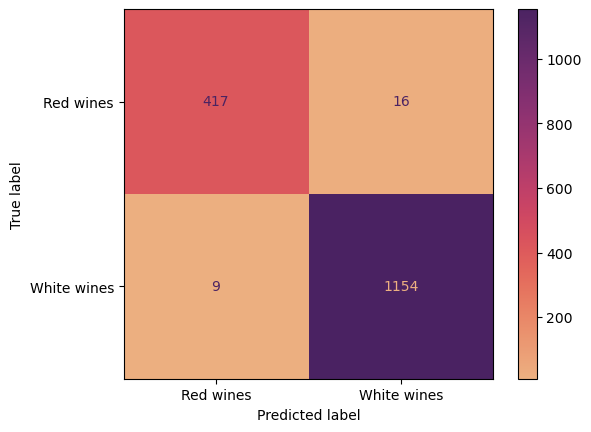

In [107]:
# Confusion matrix 

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

CM = confusion_matrix(ynd_test, predict_wscale) # will display true positive, true negative, false positive and false negative

disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=["Red wines","White wines"])

disp.plot(cmap='flare')
plt.show()

array([[0.11965812, 0.16      , 0.07228916, ..., 0.        , 1.        ,
        0.        ],
       [0.21367521, 0.14666667, 0.1626506 , ..., 0.        , 1.        ,
        0.        ],
       [0.22222222, 0.09333333, 0.19277108, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.4957265 , 0.40666667, 0.19277108, ..., 1.        , 0.        ,
        0.        ],
       [0.45299145, 0.04      , 0.22289157, ..., 0.        , 1.        ,
        0.        ],
       [0.31623932, 0.20666667, 0.27710843, ..., 1.        , 0.        ,
        0.        ]])

In [110]:
# Classification report

from sklearn.metrics import classification_report

print('Classification report: \n\n', classification_report(ynd_test, predict_wscale, target_names=["red","white"]))


Classification report: 

               precision    recall  f1-score   support

         red       0.98      0.96      0.97       433
       white       0.99      0.99      0.99      1163

    accuracy                           0.98      1596
   macro avg       0.98      0.98      0.98      1596
weighted avg       0.98      0.98      0.98      1596



In [94]:
# Cohen-Kappa score

from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(predict_wscale, ynd_test)

print('Cohen-Kappa Score is:', kappa)


Cohen-Kappa Score is: 0.9601815481893083


In [135]:
# Stratified k-Fold cross-validation 
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=1)
skf.get_n_splits(X,y)

for i, (train_index, test_index) in enumerate(skf.split(X_nd, y_nd)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[   0    1    2 ... 5316 5317 5318]
  Test:  index=[   3    4    5 ... 5312 5313 5319]
Fold 1:
  Train: index=[   1    3    4 ... 5315 5317 5319]
  Test:  index=[   0    2   10 ... 5310 5316 5318]
Fold 2:
  Train: index=[   0    1    2 ... 5317 5318 5319]
  Test:  index=[   6    7    8 ... 5303 5304 5314]
Fold 3:
  Train: index=[   0    2    3 ... 5316 5318 5319]
  Test:  index=[   1   15   17 ... 5309 5315 5317]


In [146]:
# cross-validation (applied to SVM model above)
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X_nd, y_nd, cv=4)
scores

array([0.98120301, 0.9887218 , 0.98947368, 0.98270677])

Droping Outliers from specific feature

In [ ]:
# droping outliers from residual sugar 

dfml_nd = dfml.drop_duplicates("")


X_nd = dfml_nd.drop('type', axis=1)
y_nd = dfml_nd['type']

Xnd_train, Xnd_test, ynd_train, ynd_test = train_test_split( X_nd, y_nd, test_size=0.30, random_state=42)

In [ ]:
# transform training data
X_train_norm = norm.transform(Xnd_train)

# transform testing data
X_test_norm = norm.transform(Xnd_test)

In [153]:
Xnd_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label_0,quality_label_1,quality_label_2
4683,6.6,0.17,0.35,2.6,0.030,33.0,78.0,0.99146,3.22,0.72,11.3,6,0,1,0
2007,6.3,0.14,0.39,1.2,0.044,26.0,116.0,0.99200,3.26,0.53,10.3,6,0,1,0
6097,6.8,0.20,0.25,6.2,0.052,22.0,106.0,0.99350,3.09,0.54,10.8,5,1,0,0
5962,7.1,0.31,0.25,11.2,0.048,32.0,136.0,0.99663,3.14,0.40,9.5,5,1,0,0
494,6.5,0.39,0.23,8.3,0.051,28.0,91.0,0.99520,3.44,0.55,12.1,6,0,1,0
